# 線形代数：回転行列 (Rotation Matrices)

このノートブックでは、**回転行列**について学びます。回転行列は、ベクトルを回転させるための行列で、機械学習やコンピュータグラフィックスで重要な応用があります。

## 目次
1. [2次元の回転行列](#2次元の回転行列)
2. [回転行列の性質](#回転行列の性質)
3. [3次元の回転行列](#3次元の回転行列)
4. [回転行列の応用](#回転行列の応用)

> **チェックポイント**: 回転行列は直交行列の一種であり、ベクトルの長さと角度を保つ変換（等長変換）です。


---

## 必要なライブラリのインポート


In [1]:
import numpy as np
import matplotlib.pyplot as plt


---

## 1. 2次元の回転行列

角度 $\theta$ だけ反時計回りに回転させる行列は：

$$R(\theta) = \begin{pmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta
\end{pmatrix}$$

ベクトル $\mathbf{v}$ を回転させるには：

$$\mathbf{v}' = R(\theta) \mathbf{v}$$


回転行列 R(45度):
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

元のベクトル v: [1 0]
回転後のベクトル v': [0.70710678 0.70710678]


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20803 (\N{CJK UNIFIED IDEOGRAPH-5143}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36578 (\N{CJK UNIFIED IDEOGRAPH-8EE2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaV

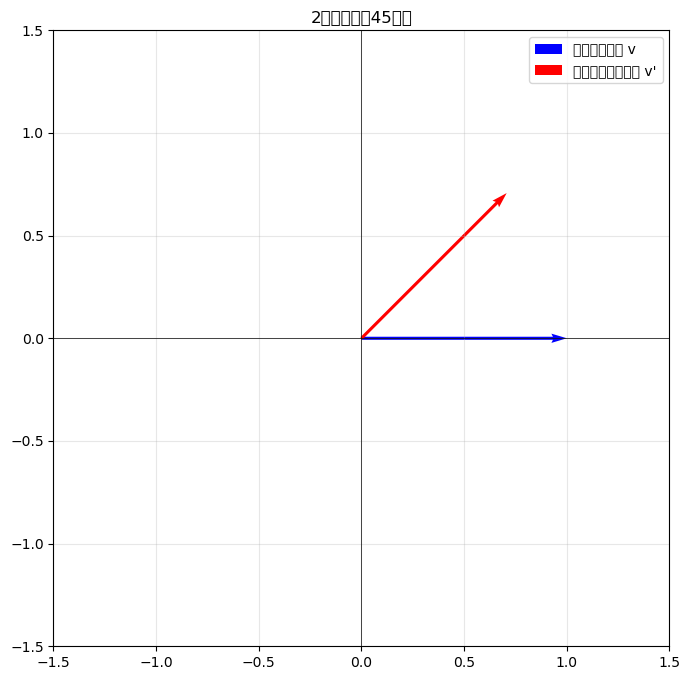

In [ ]:
# 2次元の回転行列の例

# 回転角度（ラジアン）
theta = np.pi / 4  # 45度

# 回転行列
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])

print("回転行列 R(45度):")
print(R)

# 元のベクトル
v = np.array([1, 0])  # x軸方向の単位ベクトル

# 回転後のベクトル
v_rotated = R @ v

print(f"\n元のベクトル v: {v}")
print(f"回転後のベクトル v': {v_rotated}")

# 可視化
fig, ax = plt.subplots(figsize=(8, 8))
ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1,
          color='blue', width=0.005, label='Original vector v')
ax.quiver(0, 0, v_rotated[0], v_rotated[1], angles='xy', scale_units='xy', scale=1,
          color='red', width=0.005, label='Rotated vector v\'')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)
ax.legend()
ax.set_title('2D Rotation (45 degrees)')
plt.show()


---

## 2. 回転行列の性質

1. **直交行列**: $R(\theta)^T = R(\theta)^{-1}$
2. **行列式**: $\det(R(\theta)) = 1$（面積を保つ）
3. **合成**: $R(\theta_1) R(\theta_2) = R(\theta_1 + \theta_2)$
4. **逆回転**: $R(\theta)^{-1} = R(-\theta) = R(\theta)^T$


In [3]:
# 回転行列の性質の確認

# 1. 直交行列の確認
theta = np.pi / 6  # 30度
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])

print("1. 直交行列の確認 (R^T = R^(-1)):")
print(f"R^T:\n{R.T}")
print(f"\nR^(-1):\n{np.linalg.inv(R)}")
print(f"\n等しいか？ {np.allclose(R.T, np.linalg.inv(R))}")

# 2. 行列式が1であることの確認
det_R = np.linalg.det(R)
print(f"\n2. 行列式 det(R) = {det_R:.6f} (理論値: 1.0)")

# 3. 合成の確認: R(θ1) R(θ2) = R(θ1 + θ2)
theta1 = np.pi / 6  # 30度
theta2 = np.pi / 4  # 45度

R1 = np.array([[np.cos(theta1), -np.sin(theta1)],
               [np.sin(theta1), np.cos(theta1)]])
R2 = np.array([[np.cos(theta2), -np.sin(theta2)],
               [np.sin(theta2), np.cos(theta2)]])
R_combined = R1 @ R2

R_sum = np.array([[np.cos(theta1 + theta2), -np.sin(theta1 + theta2)],
                  [np.sin(theta1 + theta2), np.cos(theta1 + theta2)]])

print(f"\n3. 合成の確認: R(30°) R(45°) = R(75°):")
print(f"等しいか？ {np.allclose(R_combined, R_sum)}")

# 4. 逆回転の確認
R_inv = np.linalg.inv(R)
R_neg = np.array([[np.cos(-theta), -np.sin(-theta)],
                  [np.sin(-theta), np.cos(-theta)]])

print(f"\n4. 逆回転の確認: R^(-1) = R(-θ):")
print(f"等しいか？ {np.allclose(R_inv, R_neg)}")


1. 直交行列の確認 (R^T = R^(-1)):
R^T:
[[ 0.8660254  0.5      ]
 [-0.5        0.8660254]]

R^(-1):
[[ 0.8660254  0.5      ]
 [-0.5        0.8660254]]

等しいか？ True

2. 行列式 det(R) = 1.000000 (理論値: 1.0)

3. 合成の確認: R(30°) R(45°) = R(75°):
等しいか？ True

4. 逆回転の確認: R^(-1) = R(-θ):
等しいか？ True


---

## 3. 3次元の回転行列

3次元空間では、各軸周りの回転行列が定義されます。

**x軸周りの回転**（角度 $\theta$）:
$$R_x(\theta) = \begin{pmatrix}
1 & 0 & 0 \\
0 & \cos\theta & -\sin\theta \\
0 & \sin\theta & \cos\theta
\end{pmatrix}$$

**y軸周りの回転**（角度 $\theta$）:
$$R_y(\theta) = \begin{pmatrix}
\cos\theta & 0 & \sin\theta \\
0 & 1 & 0 \\
-\sin\theta & 0 & \cos\theta
\end{pmatrix}$$

**z軸周りの回転**（角度 $\theta$）:
$$R_z(\theta) = \begin{pmatrix}
\cos\theta & -\sin\theta & 0 \\
\sin\theta & \cos\theta & 0 \\
0 & 0 & 1
\end{pmatrix}$$

複数の軸周りの回転を組み合わせる場合は、回転行列を掛け算します（順序が重要！）。


In [4]:
# 3次元の回転行列の例

theta = np.pi / 2  # 90度

# z軸周りの回転行列
R_z = np.array([[np.cos(theta), -np.sin(theta), 0],
                [np.sin(theta), np.cos(theta), 0],
                [0, 0, 1]])

print("z軸周りの回転行列 R_z(90度):")
print(R_z)

# 元のベクトル（x軸方向）
v = np.array([1, 0, 0])

# 回転後のベクトル
v_rotated = R_z @ v

print(f"\n元のベクトル v: {v}")
print(f"回転後のベクトル v' (y軸方向になる): {v_rotated}")

# 複数の回転の組み合わせ
# まずz軸周りに90度、次にx軸周りに90度回転
R_x = np.array([[1, 0, 0],
                [0, np.cos(theta), -np.sin(theta)],
                [0, np.sin(theta), np.cos(theta)]])

# 注意: 回転の順序が重要！
R_combined = R_x @ R_z  # まずz軸、次にx軸
print(f"\n複合回転 (z軸90度 → x軸90度):")
print(R_combined)

v_final = R_combined @ v
print(f"\n最終的なベクトル: {v_final}")


z軸周りの回転行列 R_z(90度):
[[ 6.123234e-17 -1.000000e+00  0.000000e+00]
 [ 1.000000e+00  6.123234e-17  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  1.000000e+00]]

元のベクトル v: [1 0 0]
回転後のベクトル v' (y軸方向になる): [6.123234e-17 1.000000e+00 0.000000e+00]

複合回転 (z軸90度 → x軸90度):
[[ 6.12323400e-17 -1.00000000e+00  0.00000000e+00]
 [ 6.12323400e-17  3.74939946e-33 -1.00000000e+00]
 [ 1.00000000e+00  6.12323400e-17  6.12323400e-17]]

最終的なベクトル: [6.123234e-17 6.123234e-17 1.000000e+00]


---

## 4. 回転行列の応用

回転行列は以下の場面で使用されます：

1. **コンピュータグラフィックス**: 3Dオブジェクトの回転
2. **ロボティクス**: 関節の回転を表現
3. **画像処理**: 画像の回転変換
4. **機械学習**: データ拡張（data augmentation）で画像を回転
5. **主成分分析（PCA）**: データの回転による次元削減

回転行列は**直交行列**の一種であり、ベクトルの長さと角度を保つ変換（等長変換）です。
